This notebook shows some ways to animate plots and graphs using Python.

Adpated from codes by Ken Hughes:
<br>
https://brushingupscience.wordpress.com/2016/06/21/matplotlib-animations-the-easy-way/

Date Created: 27 Feb 2019
<br>
Last Modified: 23 Mar 2019
<br>
Humans Responsible: Prickly Pythons



In [1]:
%matplotlib notebook

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import matplotlib as mpl

In [3]:
from matplotlib.animation import FuncAnimation

# 1D

In [4]:
# Create a two-dimensional array of data: F(x, t)
x = np.linspace(-3, 3, 91)
t = np.linspace(0, 25, 30)
X2, T2 = np.meshgrid(x, t)
F = np.sin((2*np.pi)/25 * T2) * np.sinc(X2)

<IPython.core.display.Javascript object>


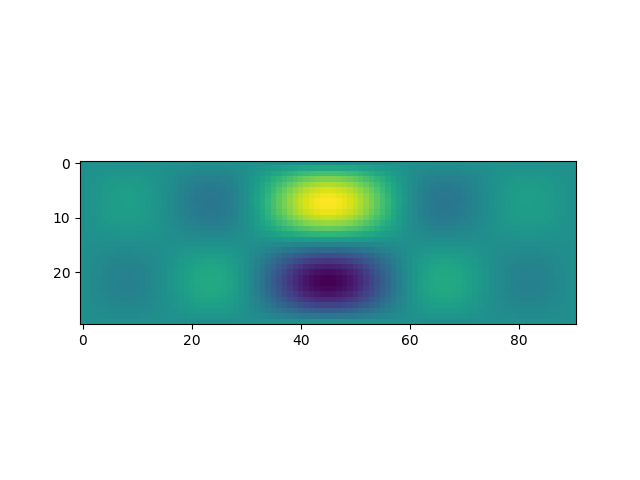

In [5]:
plt.imshow(F)
plt.show()

In [6]:
F.shape

(30, 91)

<IPython.core.display.Javascript object>


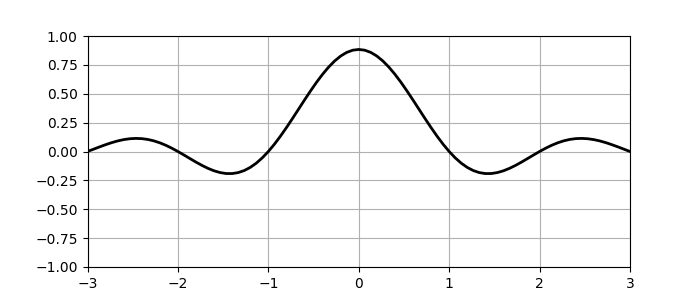

In [7]:
# Set up the figure axis
fig, ax = plt.subplots(figsize=(7, 3))
ax.set(xlim=(-3, 3), ylim=(-1, 1))
ax.grid()

line = ax.plot(x, F[0, :], color='k', lw=2)[0]

def animate(i):
    line.set_ydata(F[i, :])

anim = FuncAnimation(fig, animate, interval=100, frames=len(t)-1, repeat=True)

# 2D

In [8]:
# Create three-dimensional array of data: G(x, y, t)
x = np.linspace(-3, 3, 91)
y = np.linspace(-3, 3, 91)
t = np.linspace(0, 25, 30)
X3, Y3, T3 = np.meshgrid(x, y, t)
G = np.sin((2*np.pi)/25 * T3) * (X3**2 + Y3**2)

<IPython.core.display.Javascript object>


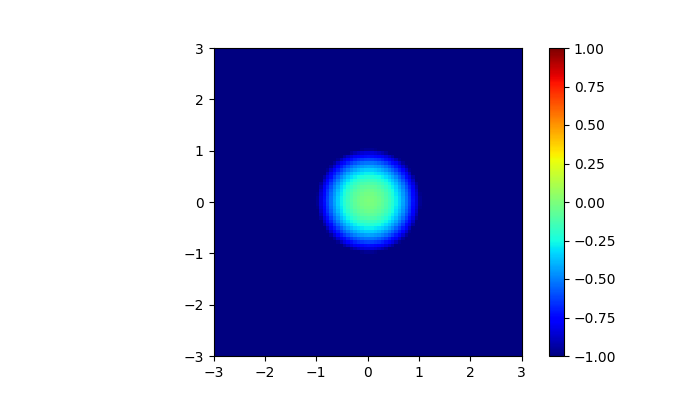

In [9]:
# Set up the figure axis
fig, ax = plt.subplots(figsize=(7, 4))
ax.set_aspect('equal')

cax = ax.pcolormesh(x, y, G[:-1, :-1, 0], vmin=-1, vmax=1, cmap='jet')
fig.colorbar(cax)

def animate(i):
    cax.set_array(G[:-1, :-1, i].flatten())

anim = FuncAnimation(fig, animate, interval=100, frames=len(t)-1, repeat=True)

# Texts

<IPython.core.display.Javascript object>


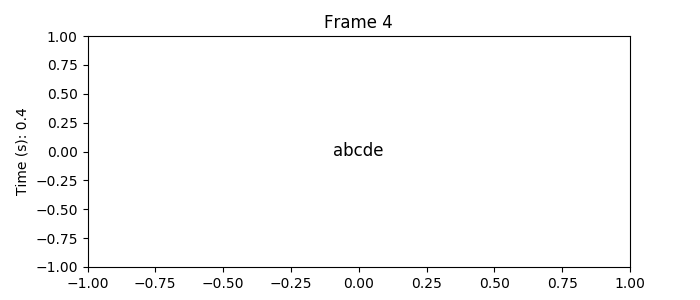

In [11]:
fig, ax = plt.subplots(figsize=(7, 3))
ax.set(xlim=(-1, 1), ylim=(-1, 1))

t = np.linspace(0, 25, 10)
string_to_type = 'abcdefghijklmnopqrstuvwxyz0123'
label = ax.text(0, 0, string_to_type[0],
                ha='center', va='center',
                fontsize=12)

def animate(i):
    label.set_text(string_to_type[:i+1])
    ax.set_ylabel('Time (s): ' + str(i/10))
    ax.set_title('Frame ' + str(i))
    
anim = FuncAnimation(fig, animate, interval=100, frames=len(t)-1, repeat=True)

# Saving your animation

In [ ]:
# Set up formatting for the movie files
# Note that if this crashes in Jupyter Notebook, try it in the terminal, it should work.

Writer = mpl.animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='name'), bitrate=1800)

anim.save('test.gif', writer=writer)